<font size=6><b>스토캐스틱 오실레이터(Stochastic Oscillator)

* <font size=4 color=blue><b>주식투자의 기술적 분석에 사용되는 보조 지표</b></font>
* <font size=4 color=blue><b>최근 n일간의 최고가와 최저가의 범위 내에서 현재 가격의 위치를 표시</b></font>
* <font size=4 color=blue><b> 스토캐스틱n= (현재 가격 - n일중 최저가)/(n일중 최고가 - n일중 최저가)</b></font>
* 대부분 증권사에서는 n(5)-m(3)-t(3)를 사용,  네이버금융은 n(15)-m(5)-t(3)   
* 매수세 > 매도세 : 위치가 높게 형성  --> 과매수 상태에 들어서면 하락 가능성이 커진다
* 매수세 < 매도세 : 위치가 낮게 형성  --> 과매도 상태에 들어서면 상승 가능성이 커진다

# Fast Stochastic 
* 그래프의 변화가 너무 잦고 급격하여 노이즈 즉 가짜 신호가 많아 매수 매도시 참고하기 어렵다
    * Fast %K = (C-L)/(H-L) * 100
    * Fast %D = Fask %K의 m기간 이동평균(SMA)

# Slow Stochastic 
* KDJ Stochastic 지표 : Fast %K (K), Slow %K (D), Slow %D (J) 
    * Slow %K = Fast %K의 m기간 이동평균(SMA)
    * Slow %D = Slow %K의 t기간 이동평균(SMA)

## 최근 15일 중 최고가 15,000원이고 최저가가 10,000, 현재가격이 14,000원 일 경우 스토캐스틱?

In [1]:
so = (14000 - 10000) / (15000 - 10000) *100
so

80.0

## 최근 15일 중 최고가 15,000원이고 최저가가 10,000, 현재가격이 11,000원 일 경우 스토캐스틱?

In [2]:
so = (11000 - 10000) / (15000 - 10000) *100
so

20.0

# 활용 예

In [3]:
import pandas as pd
import datetime as dt
from pykrx import stock
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')
sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

## fast_k, slow_k, slow_d

In [4]:
# Fast %K = n기간 Fast Stochastic 
def my_fast_k(close_price, low, high, n=5):
    #(C-L)/(H-L) * 100
    fast_k = ((close_price - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
    return fast_k

# Slow %K = Fast %K의 m기간 이동평균(SMA)
def my_slow_k(fast_k, m=3):
    slow_k = fast_k.rolling(m).mean()
    return slow_k

# Slow %D = Slow %K의 t기간 이동평균(SMA)
def my_slow_d(slow_k, t=3):
    slow_d = slow_k.rolling(t).mean()
    return slow_d

## OHLCV data load

In [5]:
start  = "2021-06-01"
end    = "2021-12-31"
ticker = "005930"
# ---------------------------------------
df = stock.get_market_ohlcv(start, end, ticker)
#df = stock.get_market_ohlcv("2021-01-01", "2021-12-31", "005930")
df.columns = ["Open","High","Low","Close","Volume"]
df.head()

,Open,High,Low,Close,Volume
날짜,,,,,
2021-06-01,80500,81300,80100,80600,14058401
2021-06-02,80400,81400,80300,80800,16414644
2021-06-03,81300,83000,81100,82800,29546007
2021-06-04,82700,82700,81500,82200,18112259
2021-06-07,82700,82800,81600,81900,16496197


In [6]:
df['fast_k'] = my_fast_k(df['Close'], df['Low'], df['High'], 5)
df['slow_k'] = my_slow_k(df['fast_k'], 3)
df['slow_d'] = my_slow_d(df['slow_k'], 3)
df.head(15)

,Open,High,Low,Close,Volume,fast_k,slow_k,slow_d
날짜,,,,,,,,
2021-06-01,80500,81300,80100,80600,14058401,NaN,NaN,NaN
2021-06-02,80400,81400,80300,80800,16414644,NaN,NaN,NaN
2021-06-03,81300,83000,81100,82800,29546007,NaN,NaN,NaN
2021-06-04,82700,82700,81500,82200,18112259,NaN,NaN,NaN
2021-06-07,82700,82800,81600,81900,16496197,62.068966,NaN,NaN
2021-06-08,82300,82600,81800,81900,12781226,59.259259,NaN,NaN
2021-06-09,81500,82000,81100,81100,14908823,0.000000,40.442742,NaN
2021-06-10,81300,81400,80900,81000,17586995,5.263158,21.507472,NaN
2021-06-11,81200,81700,80700,81000,14087962,14.285714,6.516291,22.822168


In [7]:
df = df.dropna(axis=0)
df.head()

,Open,High,Low,Close,Volume,fast_k,slow_k,slow_d
날짜,,,,,,,,
2021-06-11,81200,81700,80700,81000,14087962,14.285714,6.516291,22.822168
2021-06-14,80800,80900,80500,80500,10550078,0.000000,6.516291,11.513351
2021-06-15,80900,81200,80600,80900,10075685,26.666667,13.650794,8.894458
2021-06-16,81500,81900,81100,81800,14999855,92.857143,39.841270,20.002785
2021-06-17,81100,81300,80700,80900,14007385,28.571429,49.365079,34.285714


## plot

* 캐스틱이 80 이상일 때 과매수 상태, 20 이하일 때 과매도 상태로 판단
    * 골든크로스(매수) : 스토캐스틱 20 이하에서 <font color=blue>%K선</font>이 <font color='red'>%D</font>선을 상향 돌파
    * 데드크로스(매도) : 스토캐스틱 80 이상에서 <font color=blue>%K선</font>이 <font color='red'>%D</font>선을 하향 돌파
*   0% : N일간 최저가(가장 강한 매수세)
* 100% : N일간 최고가(가장 강한 매도세)


+매수 2021-07-08  0.00
+매수 2021-08-17  2.38
+매수 2021-08-18  11.94
+매수 2021-08-19  0.00
+매수 2021-08-20  5.71
-매도 2021-09-06  90.91
+매수 2021-10-07  11.11
+매수 2021-10-08  10.71
+매수 2021-10-12  6.98
+매수 2021-10-13  11.11
-매도 2021-12-07  95.08
-매도 2021-12-09  91.11
-매도 2021-12-21  81.82
-매도 2021-12-27  81.82


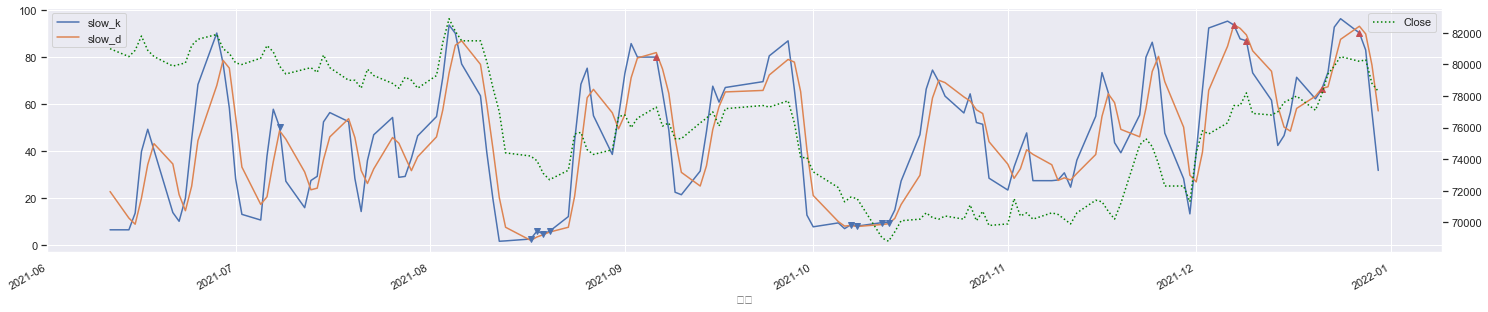

In [8]:
fig, ax1 = plt.subplots(figsize = (25, 5))

# Slow %K, Slow %D를 그려서 확인
df[['slow_k', 'slow_d']].plot(ax=ax1)
# ax.hlines([20,80], df.index.min(), df.index.max(), color ="green", linestyle="--")

for i in range(len(df.index)):
    if df["fast_k"].values[i] <= 20 and (df["slow_k"].values[i] > df["slow_d"].values[i]) :    #콜든크로스(매수)
        print(f"+매수 {pd.to_datetime(df.index.values[i]).strftime('%Y-%m-%d')}  {df['fast_k'].values[i]:.2f}")
        ax1.plot(df.index.values[i], df['slow_k'].values[i], 'bv')
    elif df["fast_k"].values[i] >= 80 and (df["slow_k"].values[i] < df["slow_d"].values[i]) :  #데드크로스(매도)
        print(f"-매도 {pd.to_datetime(df.index.values[i]).strftime('%Y-%m-%d')}  {df['fast_k'].values[i]:.2f}")
        ax1.plot(df.index.values[i], df['slow_k'].values[i], 'r^')    

ax2 = ax1.twinx()
df['Close'].plot(ax=ax2,  color='green', linestyle='dotted')
ax2.grid(False)
ax2.legend()

plt.show()

# TA-Lib

* https://github.com/mrjbq7/ta-lib
* https://mrjbq7.github.io/ta-lib/func_groups/momentum_indicators.html

In [9]:
import numpy
import talib
from talib.abstract import *

## STOCH - Stochastic
* slowk, slowd = STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)

In [16]:
slowk, slowd = talib.STOCH(df['High'], df['Low'], df['Close'], 
                           fastk_period=5, 
                           slowk_period=3, slowk_matype=0, 
                           slowd_period=3, slowd_matype=0)

In [11]:
slowk.tail()

날짜
2021-12-24    96.458333
2021-12-27    90.397727
2021-12-28    83.106061
2021-12-29    56.620553
2021-12-30    31.816962
dtype: float64

In [12]:
slowd.tail()

날짜
2021-12-24    87.668533
2021-12-27    93.251263
2021-12-28    89.987374
2021-12-29    76.708114
2021-12-30    57.181192
dtype: float64

## STOCHF - Stochastic Fast
* fastk, fastd = STOCHF(high, low, close, fastk_period=5, fastd_period=3, fastd_matype=0)

In [13]:
fastk, fastd = talib.STOCHF(df['High'], df['Low'], df['Close'],  
                            fastk_period=5, 
                            fastd_period=3, fastd_matype=0)

In [14]:
fastk.tail()

날짜
2021-12-24    92.500000
2021-12-27    81.818182
2021-12-28    75.000000
2021-12-29    13.043478
2021-12-30     7.407407
dtype: float64

## df 값 비교

In [15]:
df.tail()

,Open,High,Low,Close,Volume,fast_k,slow_k,slow_d
날짜,,,,,,,,
2021-12-24,80200,80800,80200,80500,12086380,92.500000,96.458333,87.668533
2021-12-27,80600,80600,79800,80200,10783368,81.818182,90.397727,93.251263
2021-12-28,80200,80400,79700,80300,18226325,75.000000,83.106061,89.987374
2021-12-29,80200,80200,78500,78800,19794795,13.043478,56.620553,76.708114
2021-12-30,78900,79500,78100,78300,14236700,7.407407,31.816962,57.181192
